### Imports and Utility-Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%run ./library/traffic_simulation.py
%run ../utils/helper.py

In [2]:
def draw_lines_based_on_points_on_plot(points, ax=None, line_color='blue', line_size=0.5):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(points[:, 0], points[:, 1], color=line_color, linewidth=line_size)

    return ax

In [3]:
def visualize_line_change_by_theta(line, theta):
    new_endpoint = calculate_rotated_line(line[0], line[1], theta)
    new_line = [line[1], new_endpoint]
    
    plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], 'r-', label='Original Line')

    # Plot the new line
    plt.plot([new_line[0][0], new_line[1][0]], [new_line[0][1], new_line[1][1]], 'b-', label='New Line')
    
    # Plotting points for clarity
    plt.scatter(*line[0], color='red', zorder=5)
    plt.scatter(*line[1], color='red', zorder=5)
    plt.scatter(*new_line[0], color='blue', zorder=5)
    plt.scatter(*new_line[1], color='blue', zorder=5)
    
    # Labeling the points
    plt.text(line[0][0], line[0][1], 'A', fontsize=12, ha='right')
    plt.text(line[1][0], line[1][1], 'B', fontsize=12, ha='right')
    plt.text(new_line[1][0], new_line[1][1], "B'", fontsize=12, ha='right')
    
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.legend()
    plt.title('Visualizing Line Transformation')
    plt.show()


### Theory


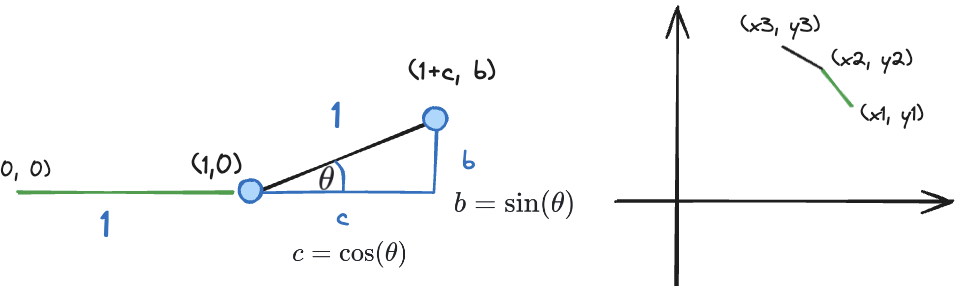
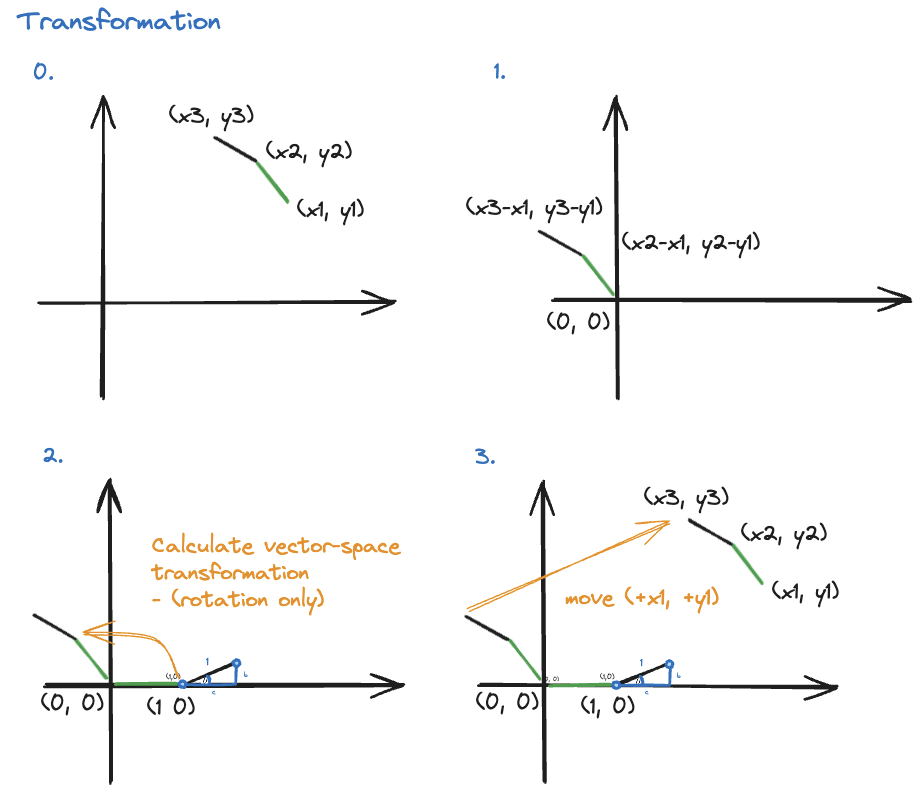

In [4]:
html(calculate_rotated_line)

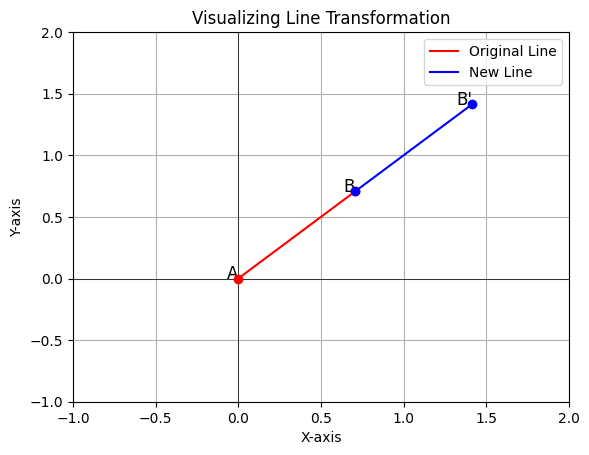

In [5]:
line = [[0, 0], [0.7071, 0.7071]]
theta = np.radians(0)
visualize_line_change_by_theta(line, theta)

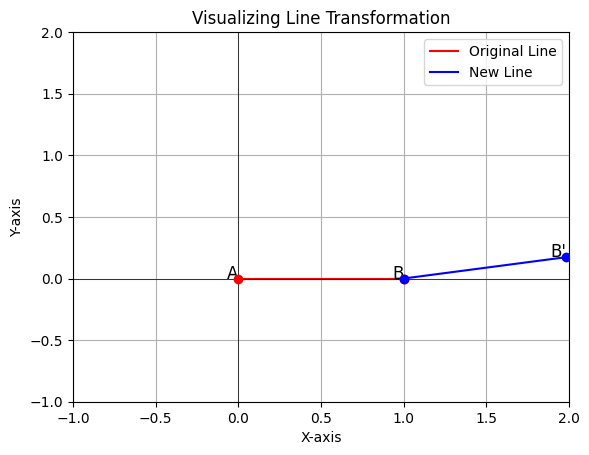

In [6]:
line = [[0, 0], [1, 0]]
theta = np.radians(10)
visualize_line_change_by_theta(line, theta)

### Streets-Building

In [7]:
def calc_roation_angles_from_tuple(angle_count_tuples):
    return np.radians(np.repeat([angle for angle, count in angle_count_tuples], [count for angle, count in angle_count_tuples]))

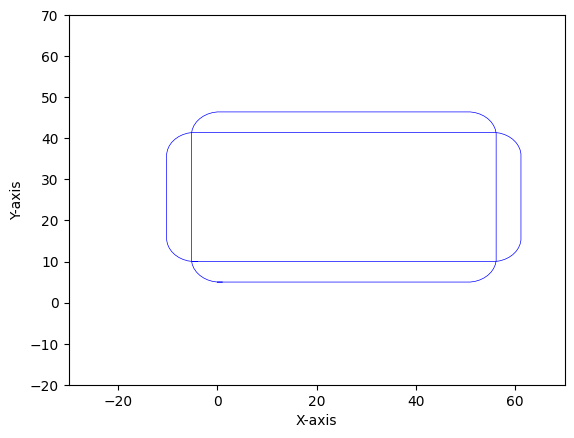

In [9]:
fig, ax = plt.subplots()
ax.set_xlim(-30, 70)
ax.set_ylim(-20, 70)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

angle_count_tuples = [[0, 60], [10, 9], [0, 20], [10, 9], [0, 60], [10, 9], [0, 20], [10, 9]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[-5, 10], [-4, 10]] # start with two entries
point_sequence = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence, ax, line_color='blue') # TODO

angle_count_tuples = [[0, 50], [10, 9], [0, 30], [10, 9], [0, 50], [10, 9], [0, 30], [10, 9]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[0, 5], [1, 5]]
point_sequence = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence, ax, line_color='blue') # TODO

plt.show()

### Car-Simulation

In [19]:
def draw_points_on_plot(point_sequence, ax, line_color, point_size=1):
    x, y = zip(*point_sequence)
    ax.scatter(x, y, color=line_color, s=point_size)
    return ax

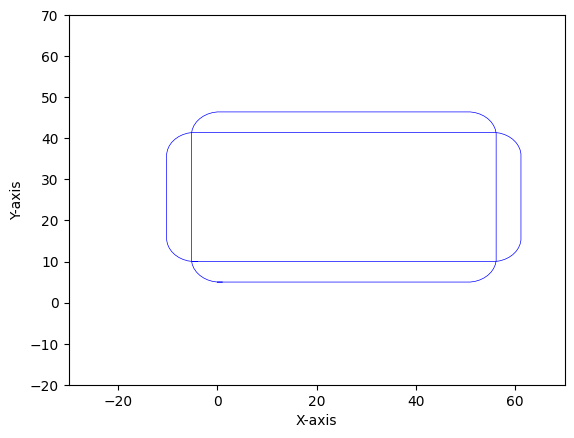

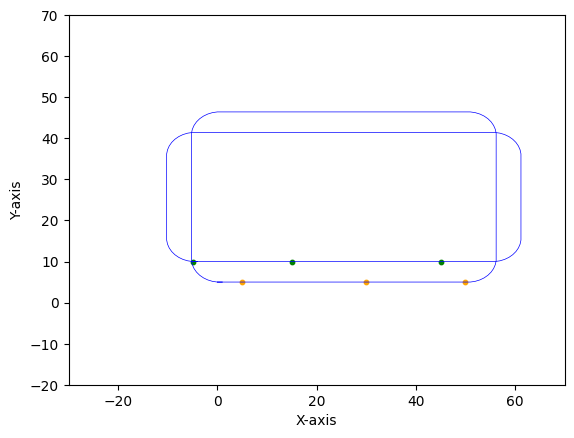

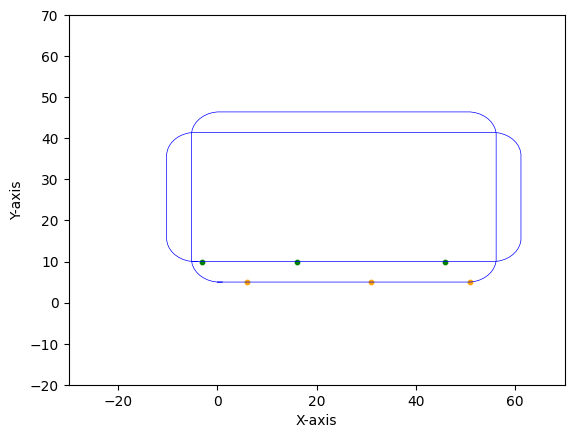

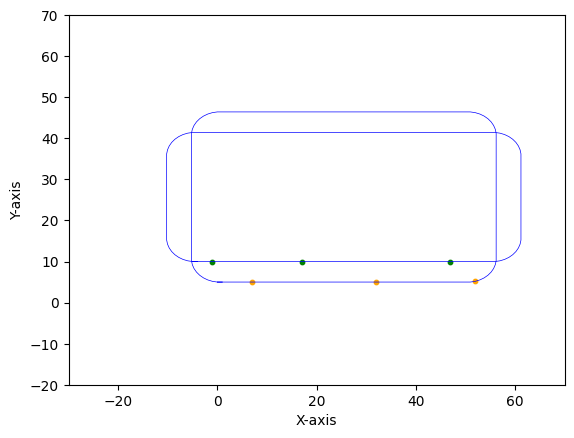

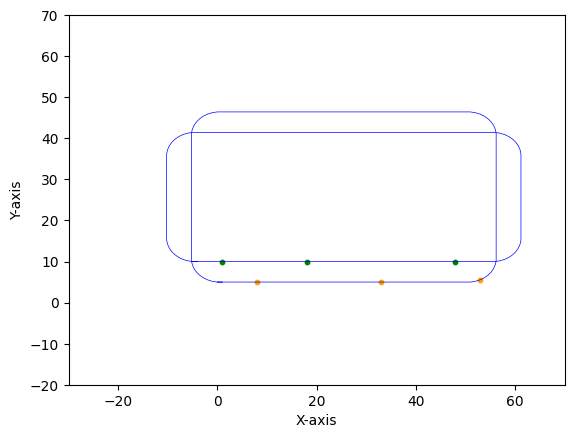

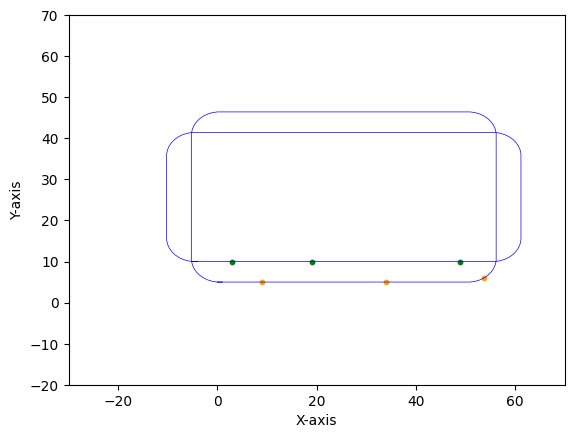

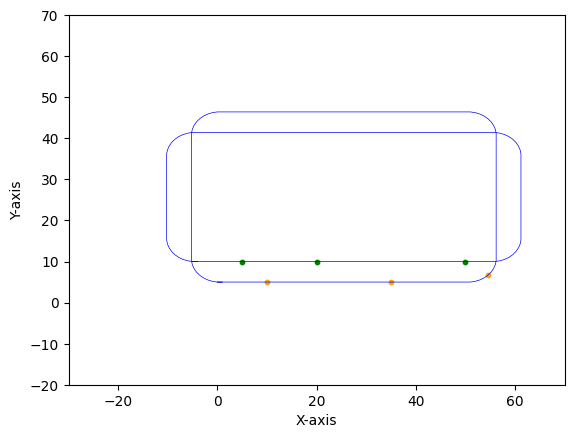

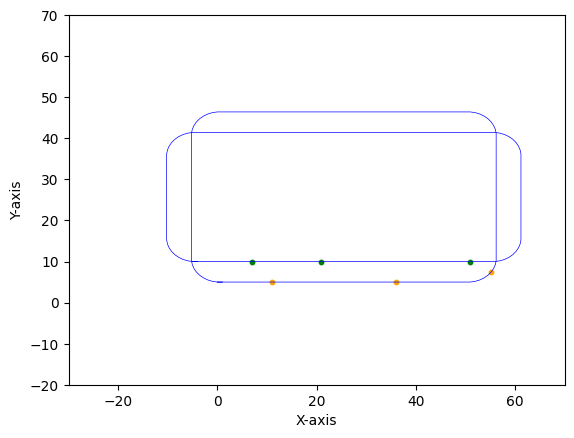

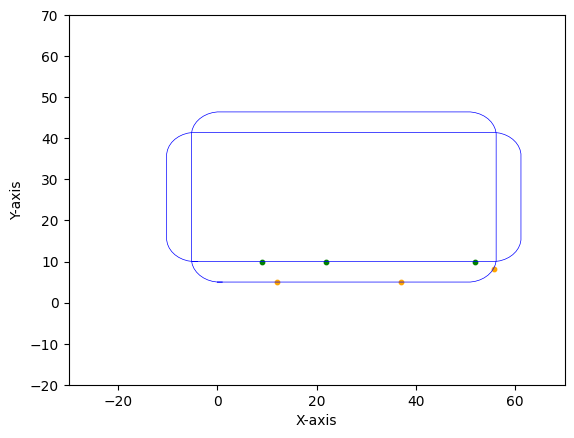

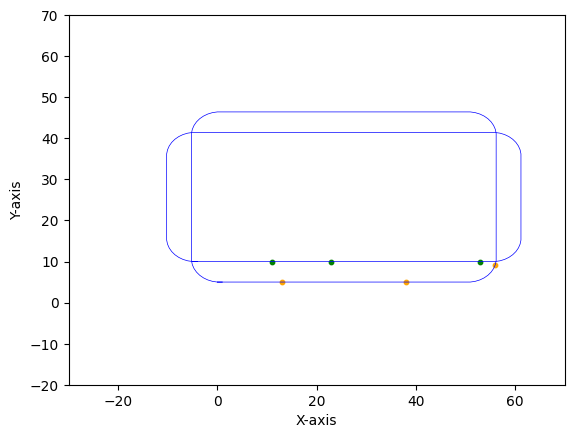

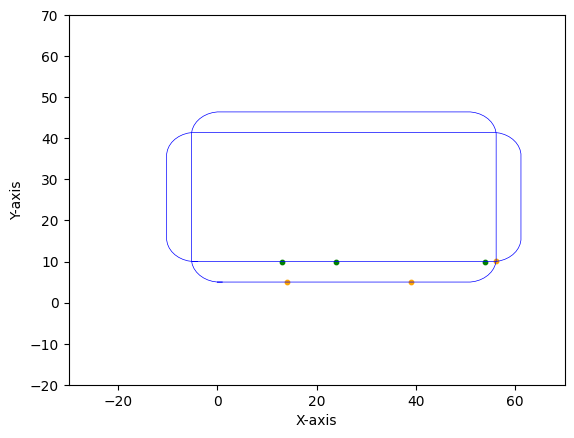

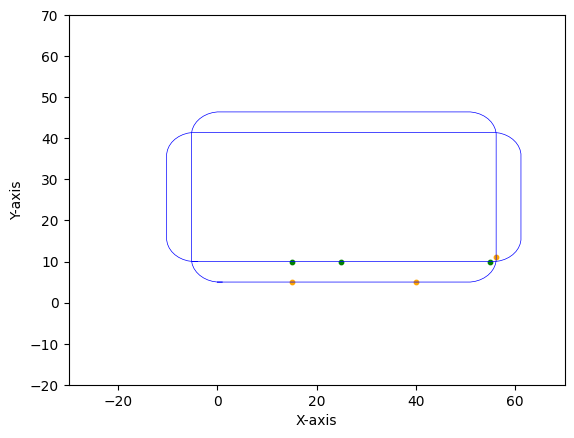

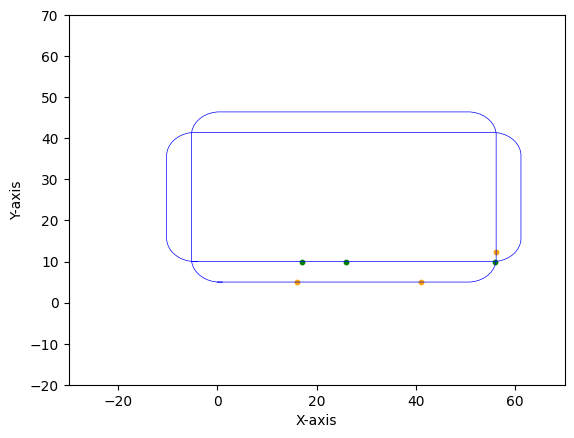

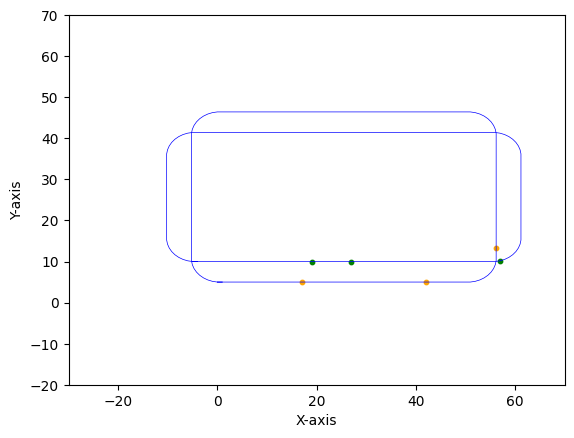

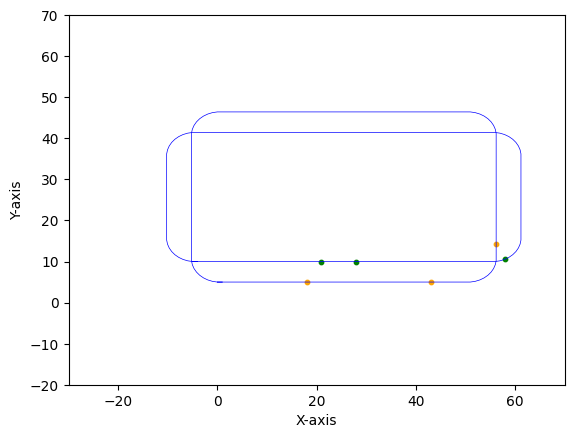

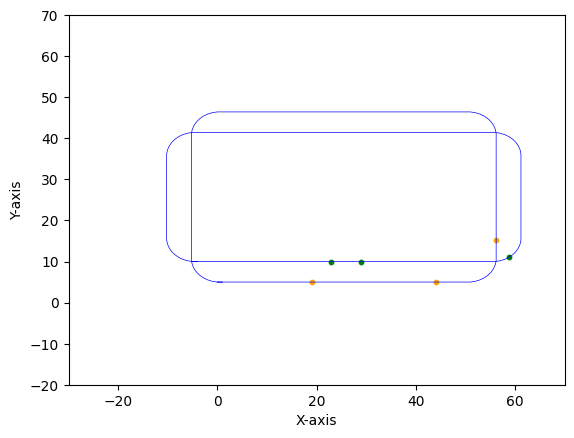

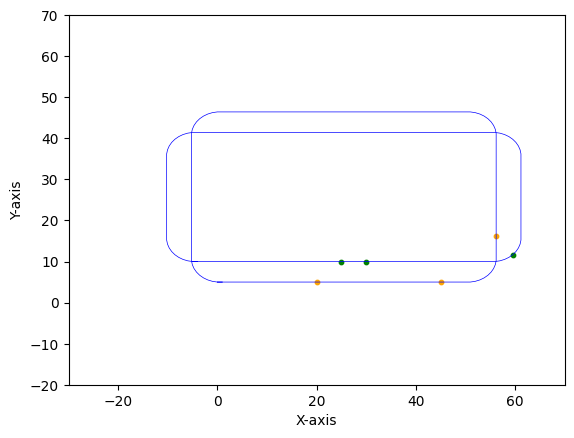

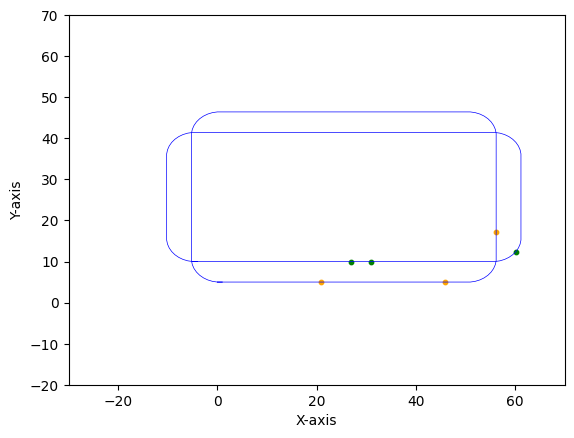

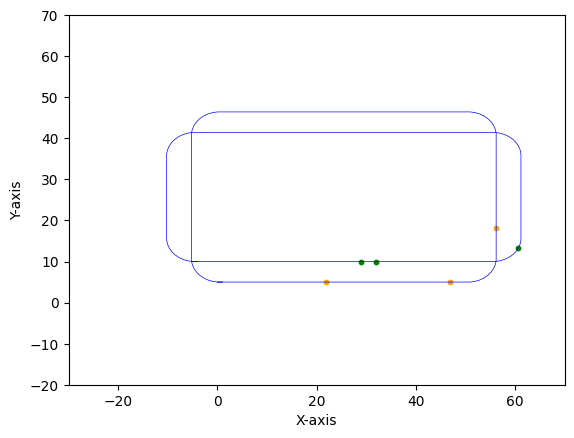

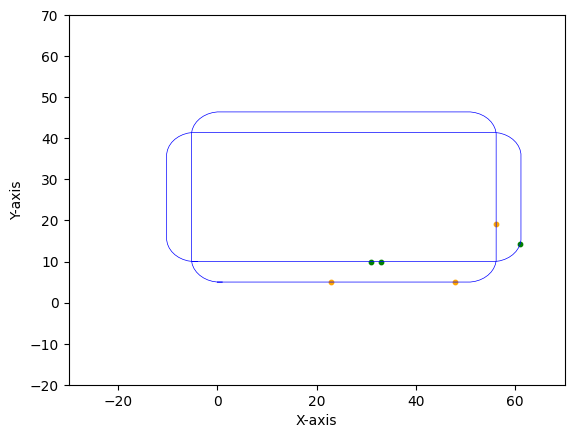

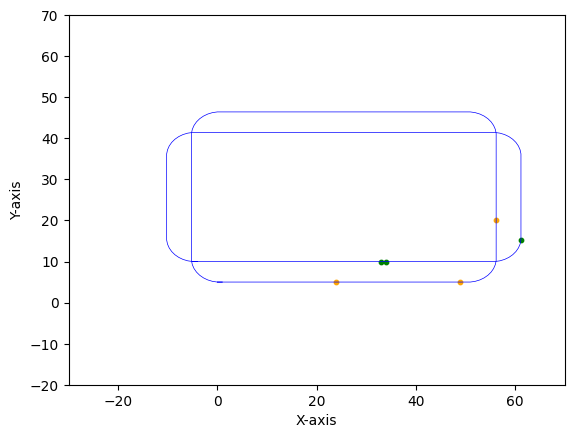

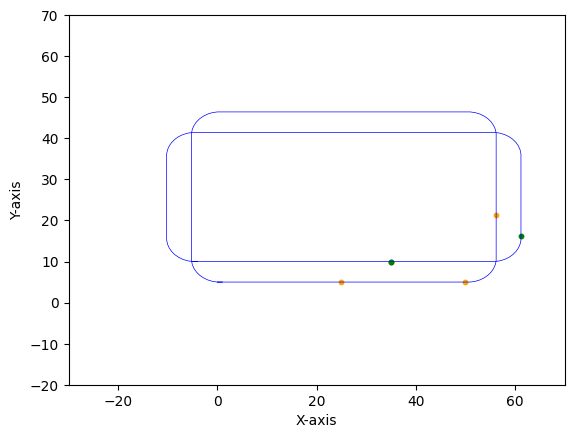

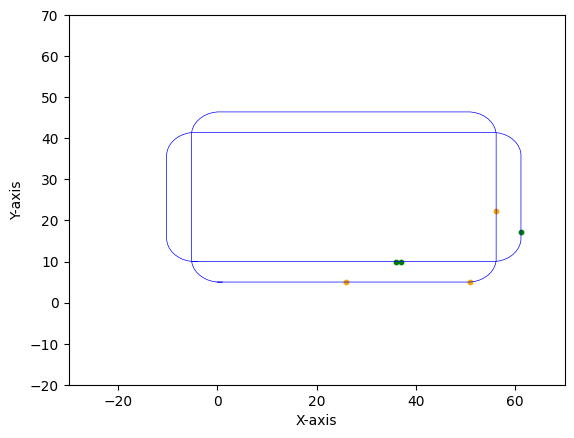

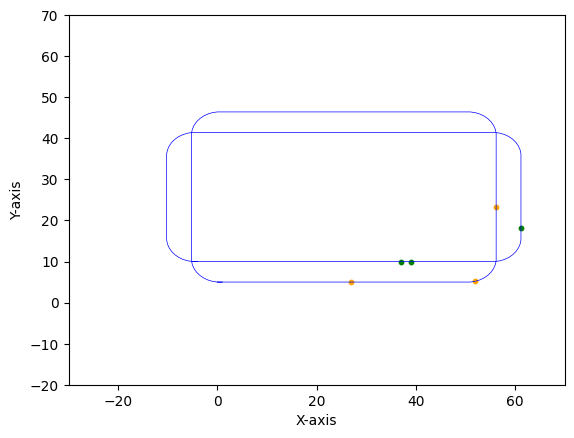

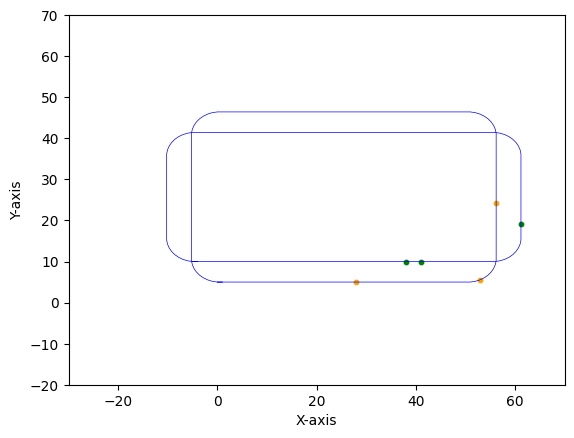

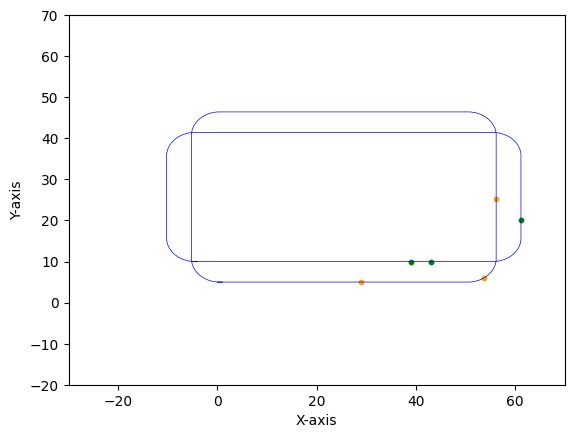

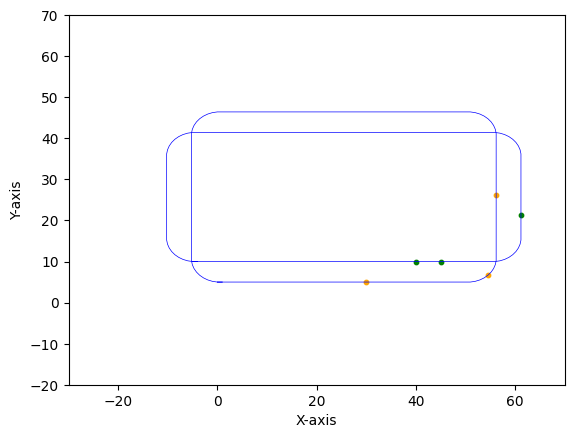

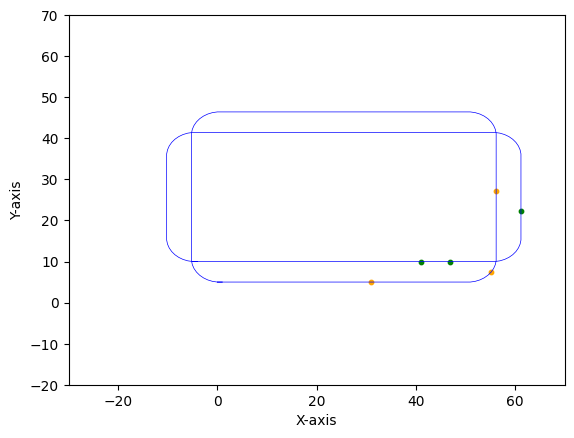

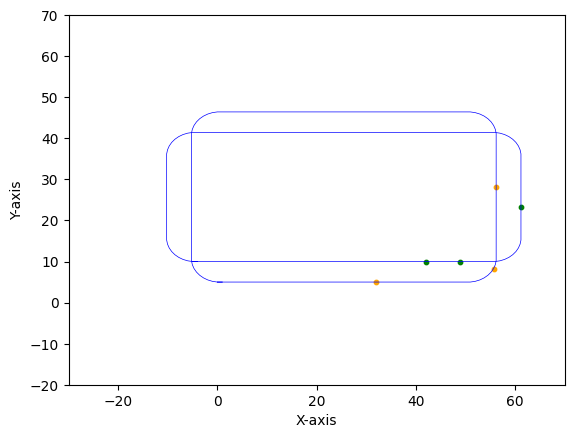

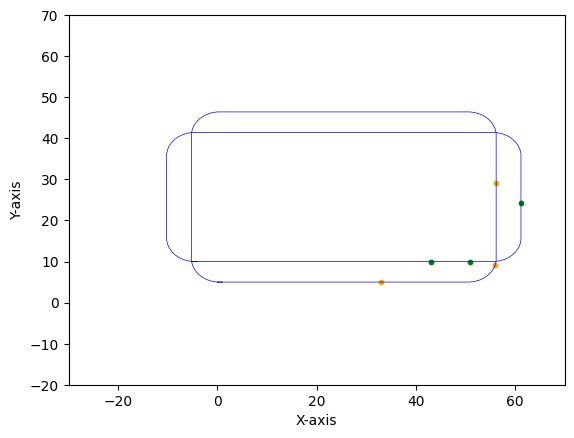

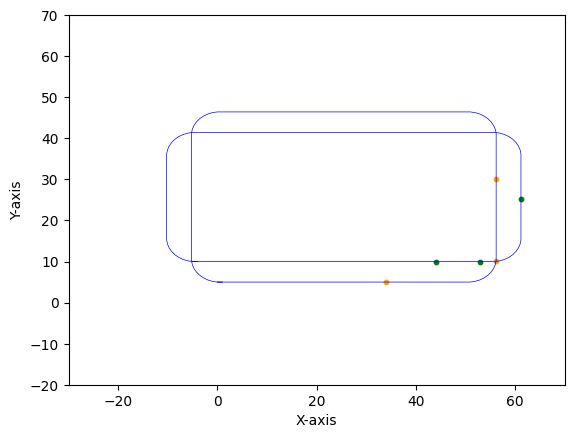

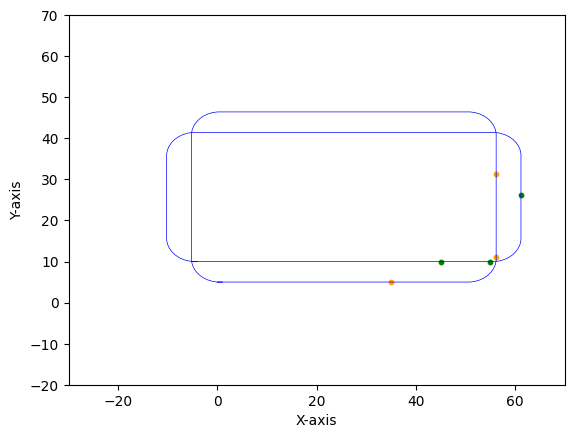

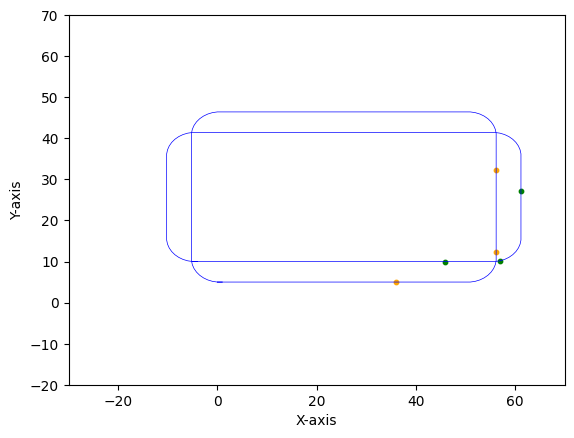

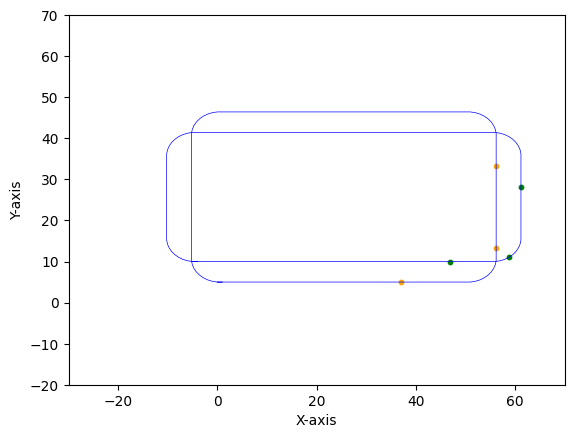

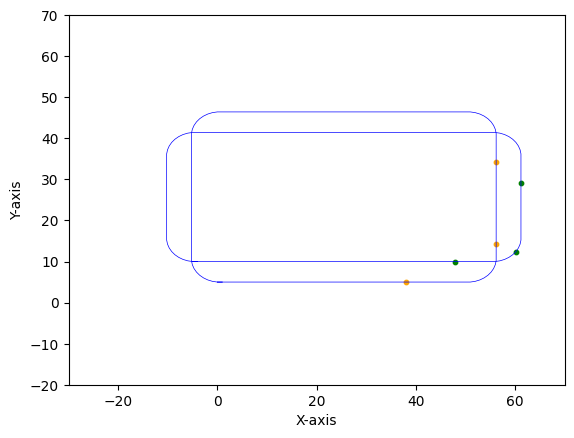

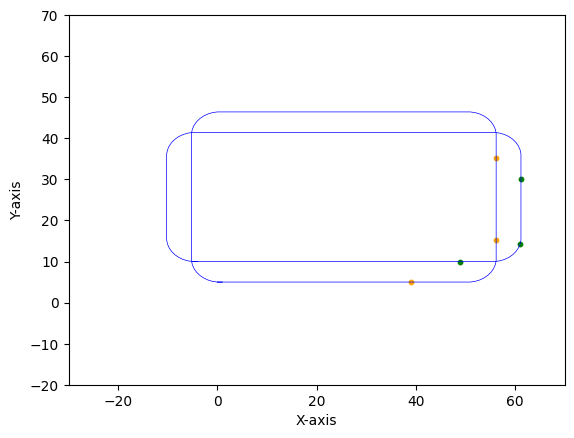

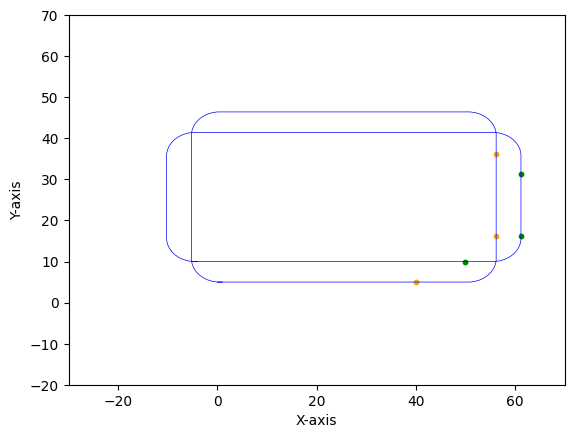

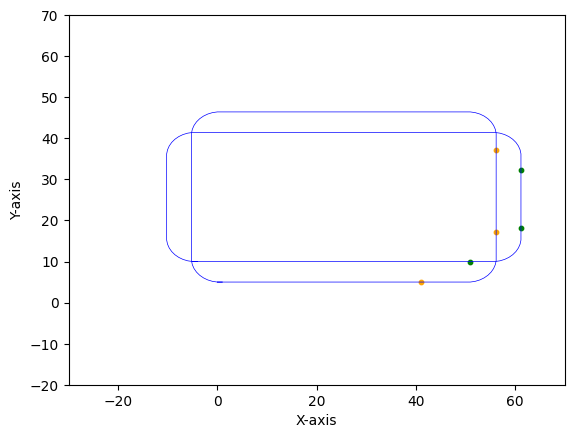

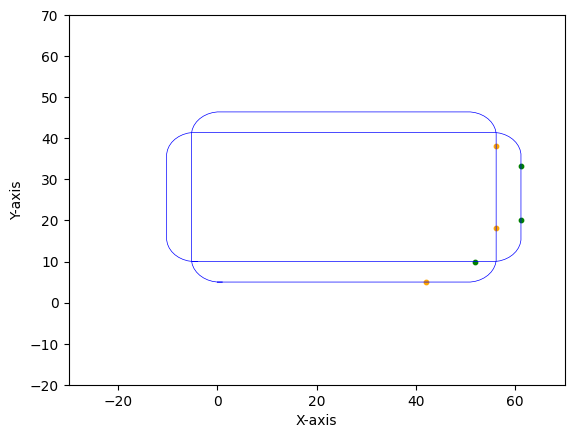

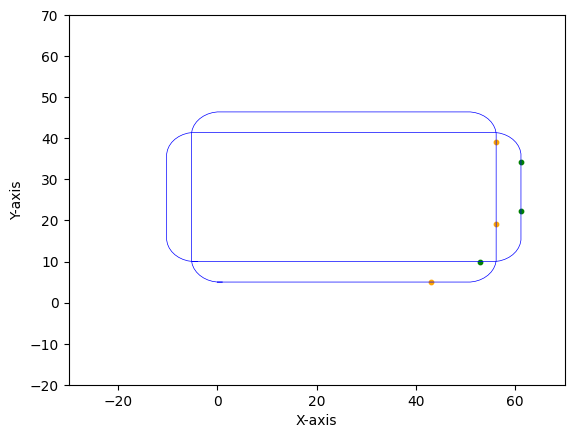

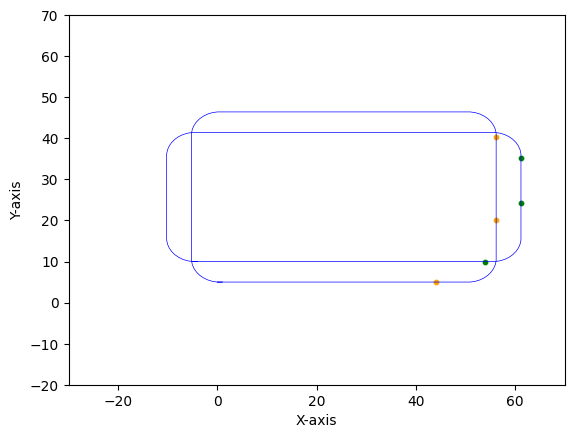

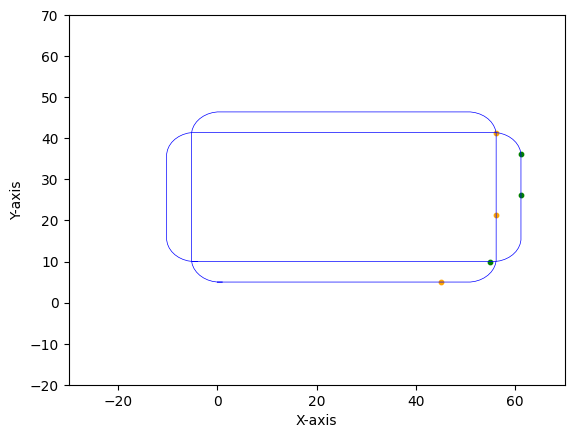

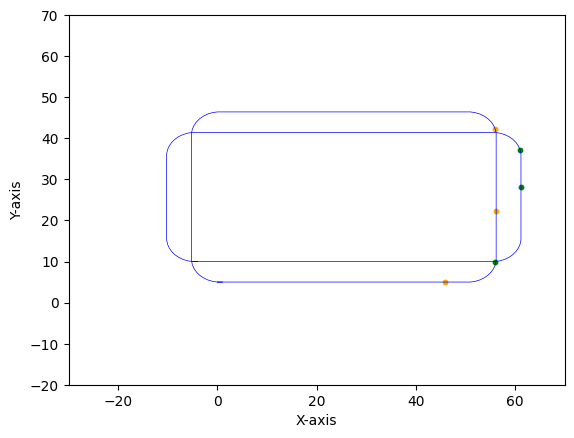

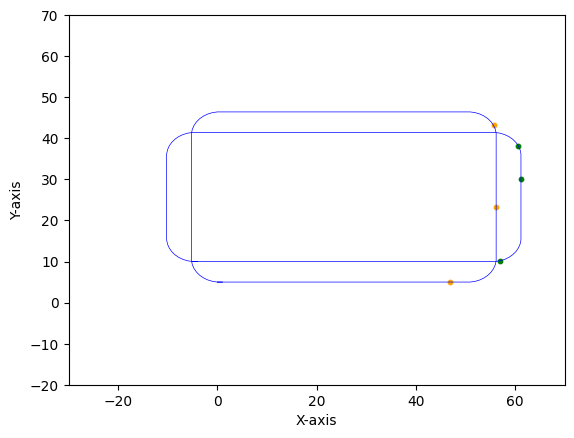

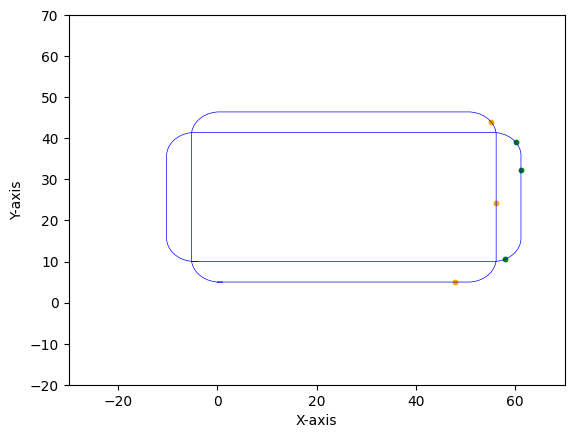

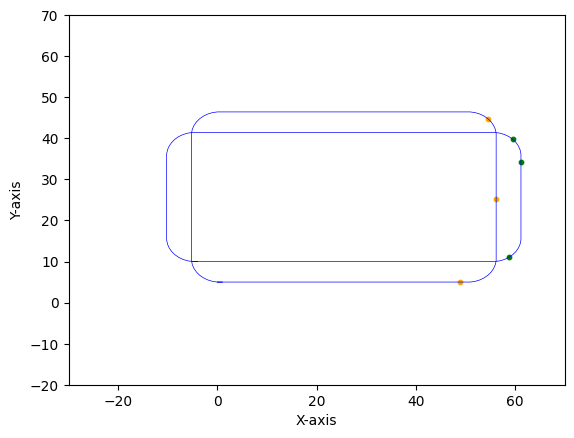

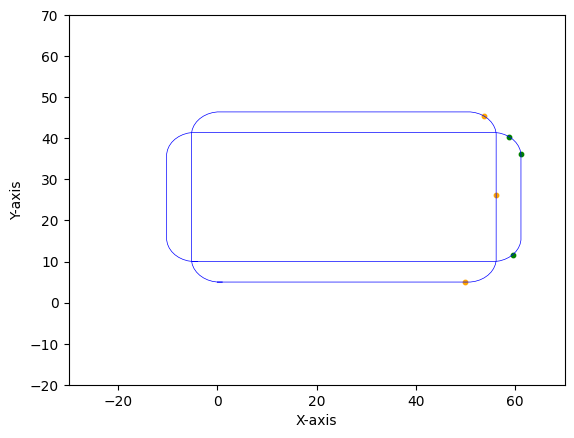

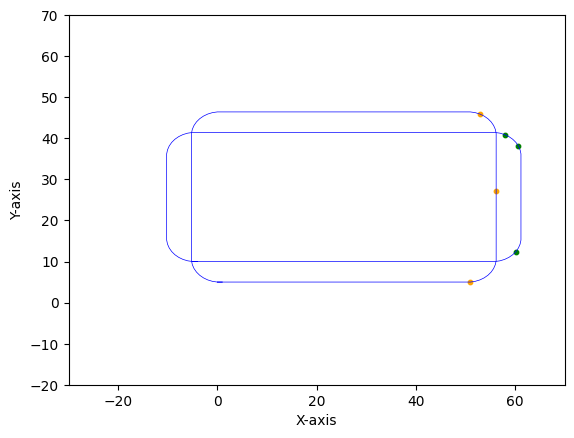

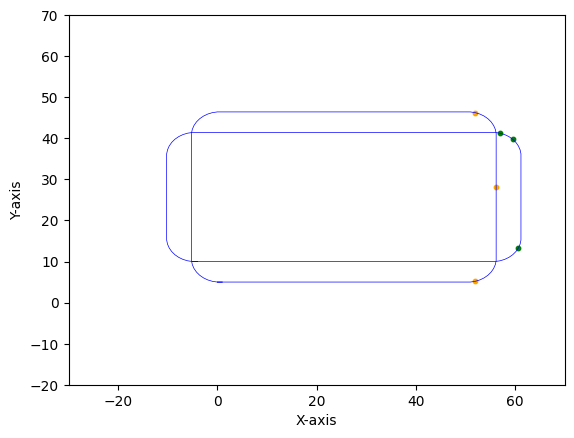

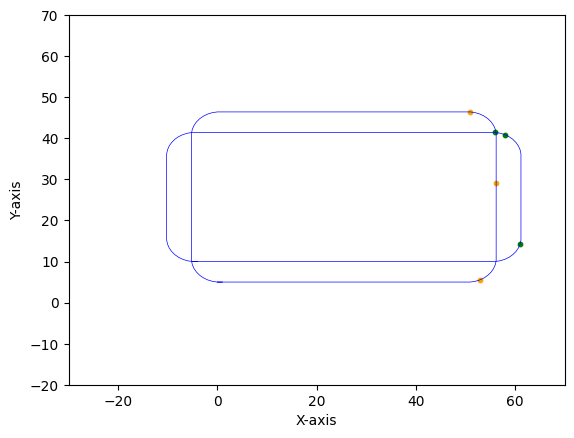

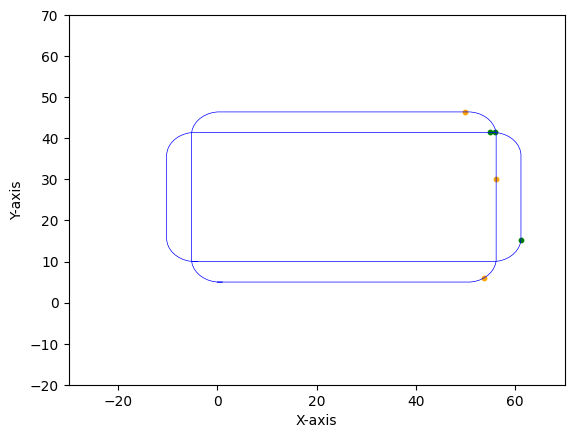

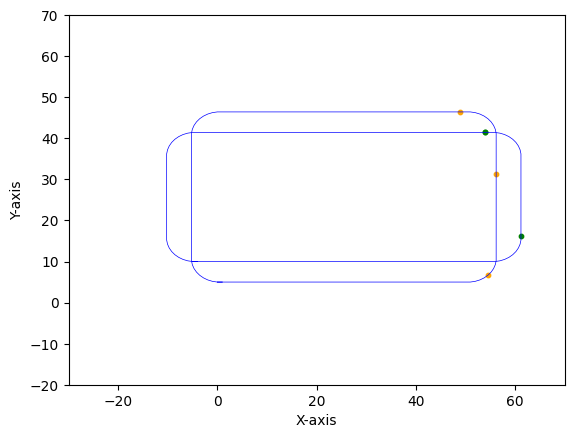

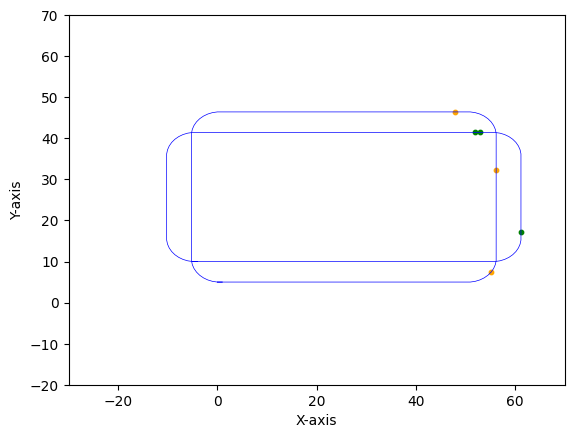

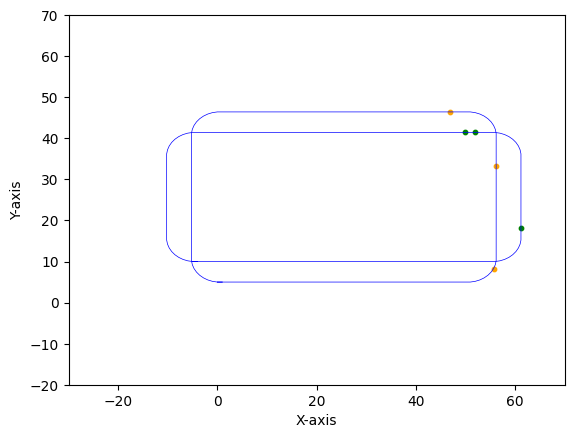

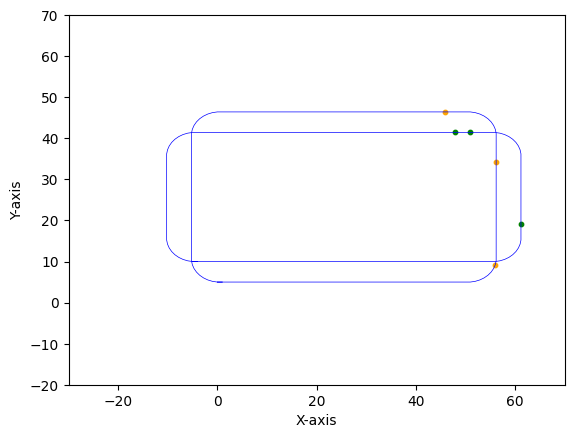

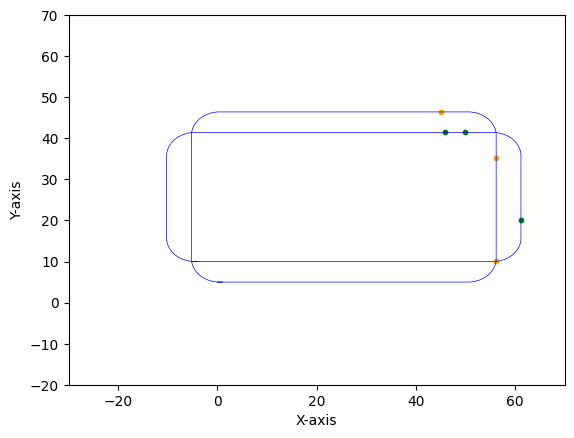

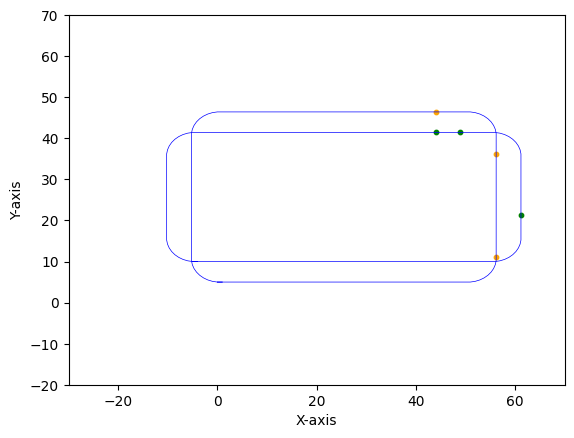

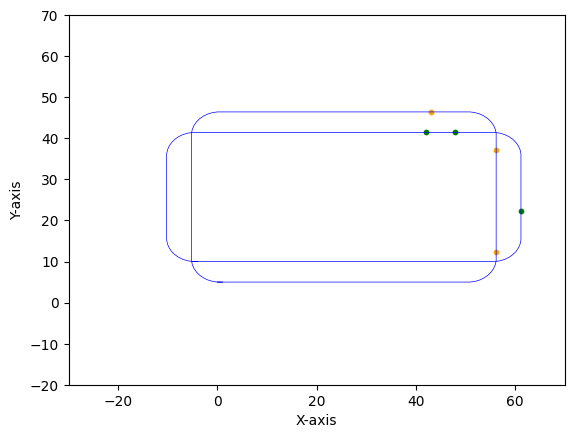

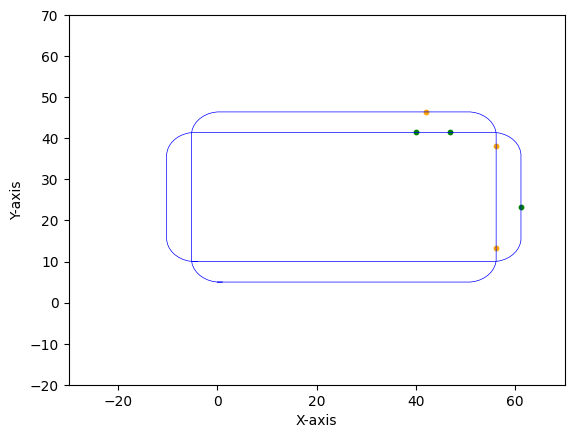

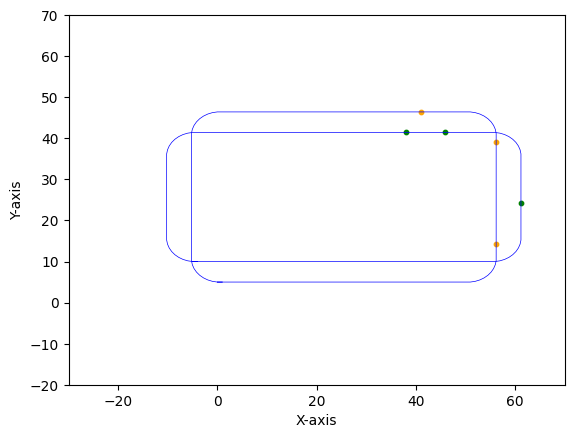

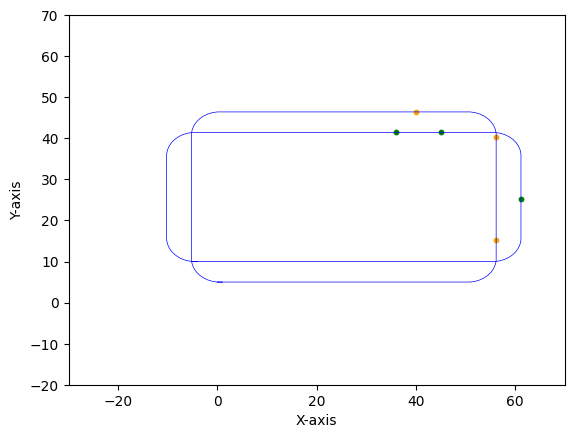

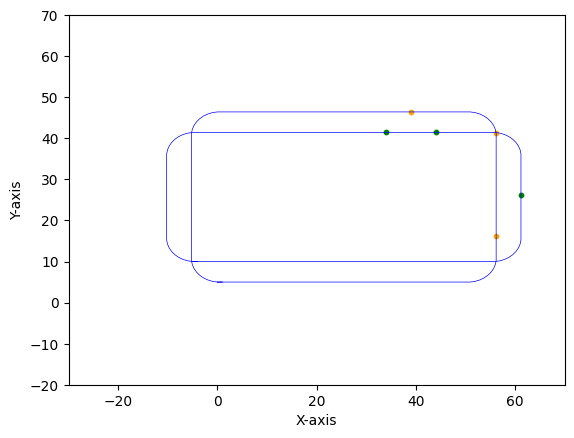

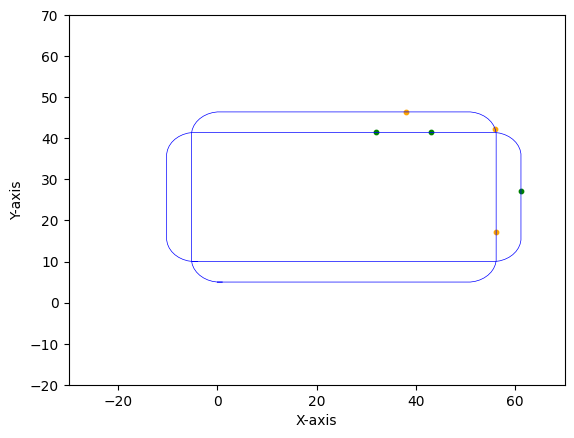

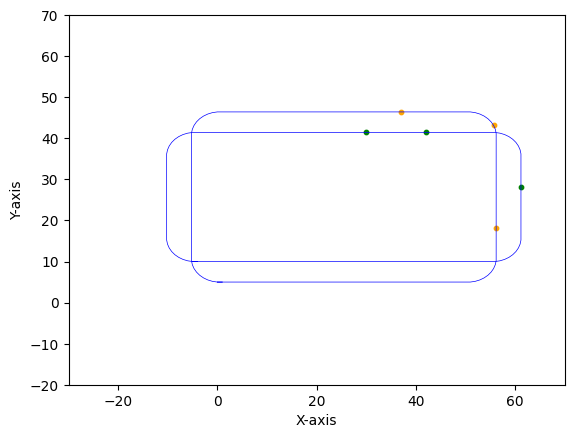

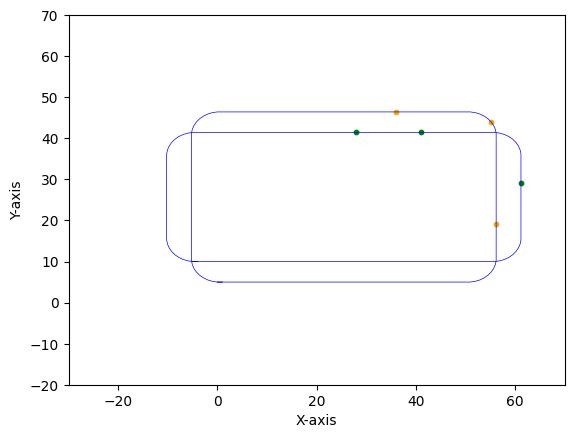

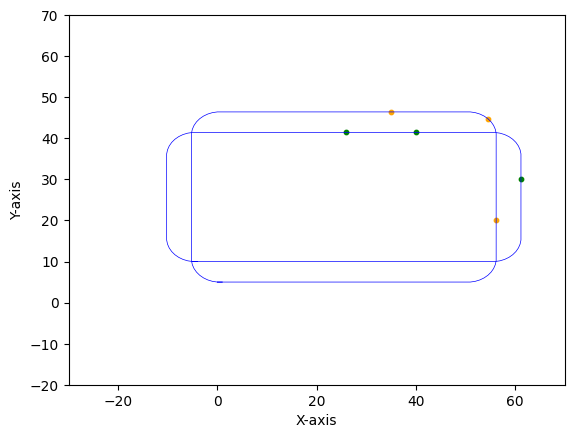

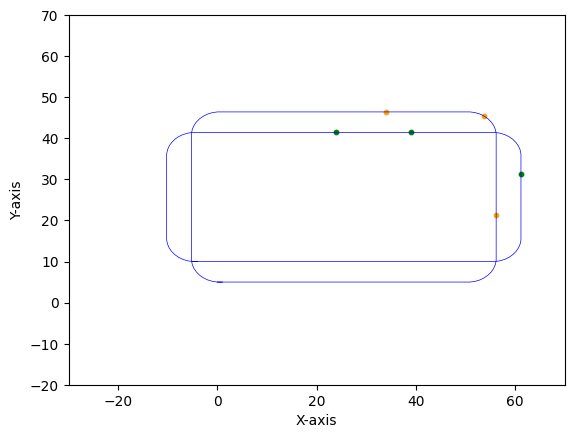

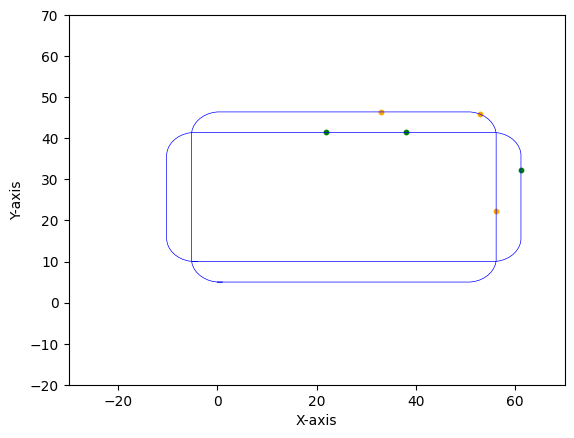

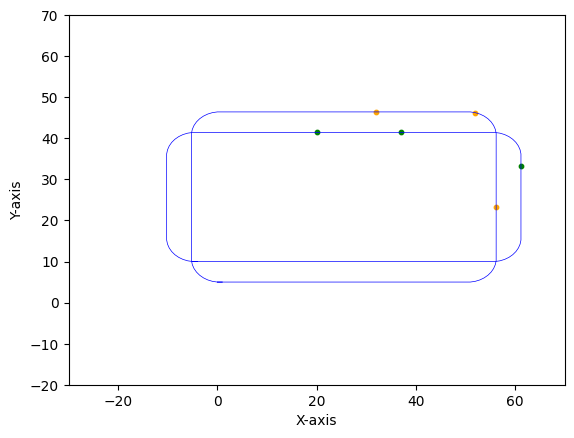

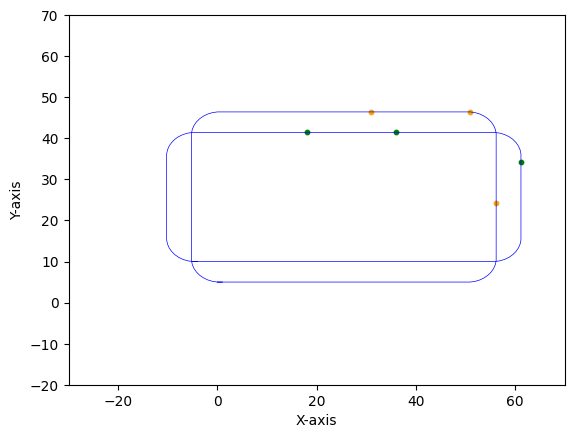

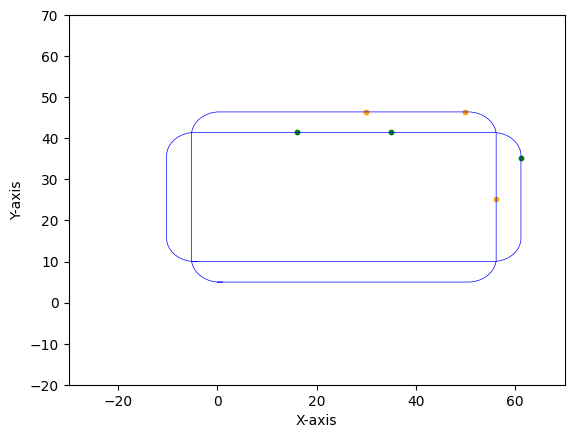

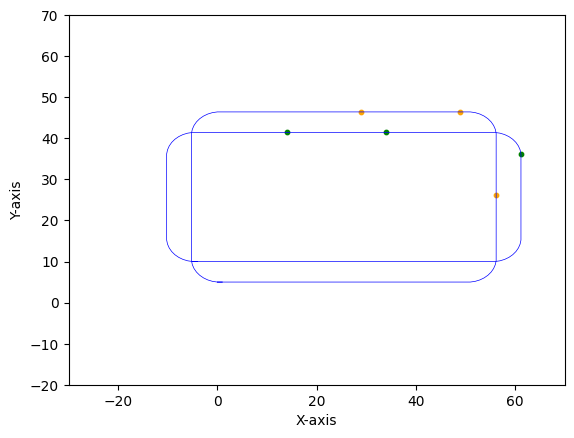

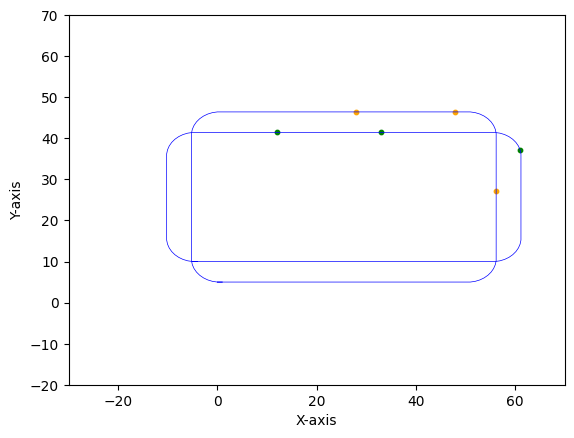

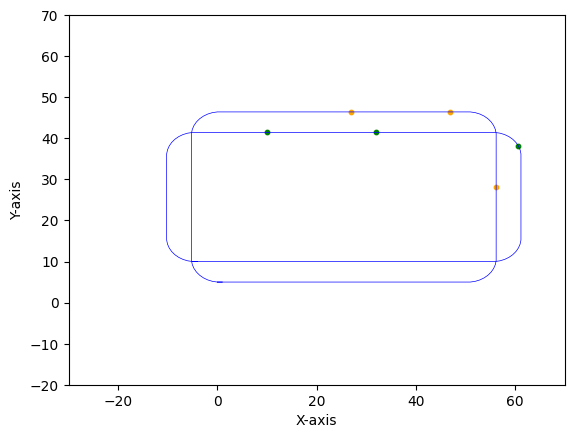

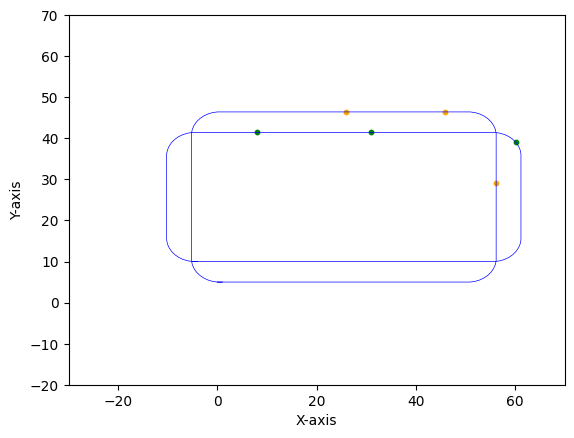

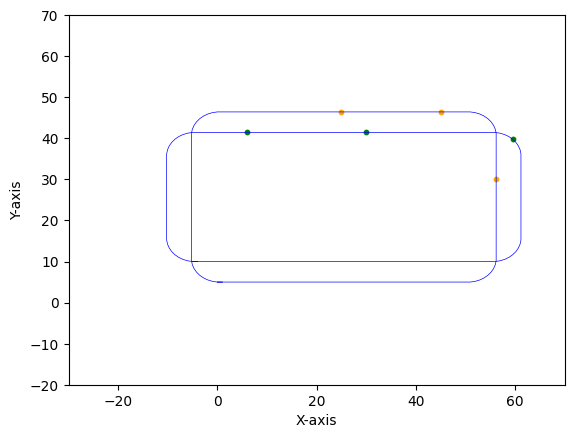

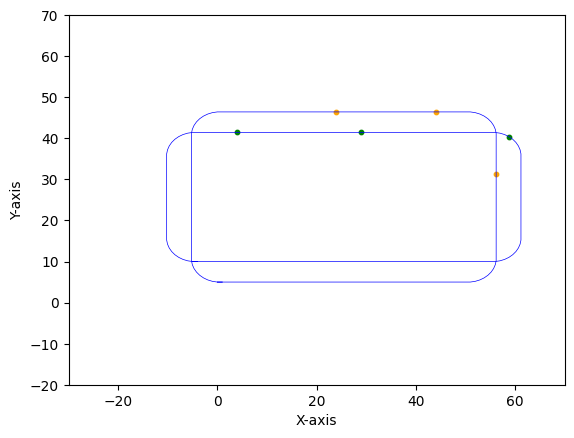

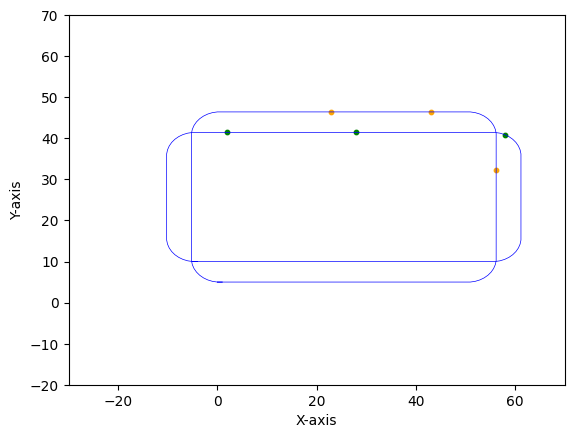

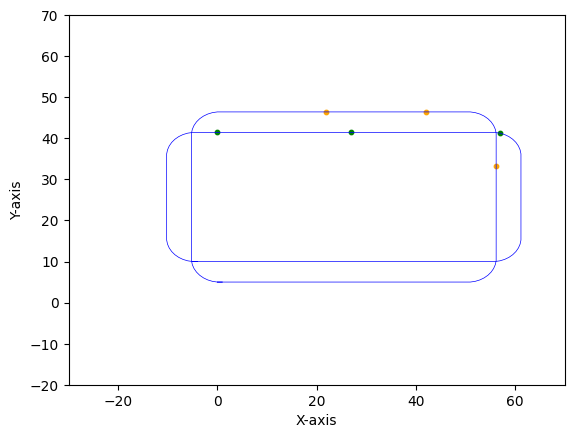

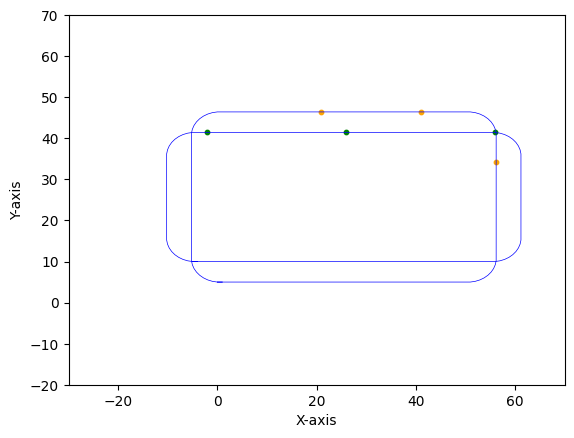

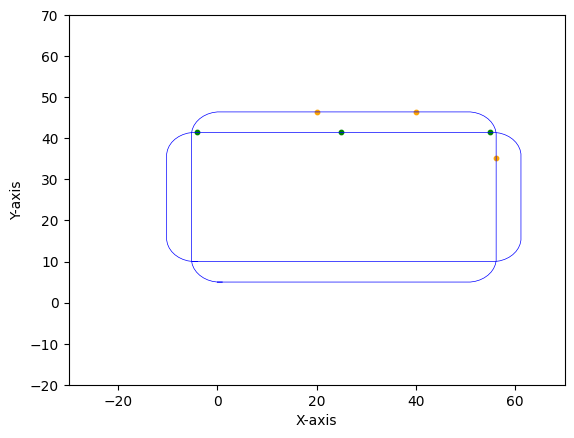

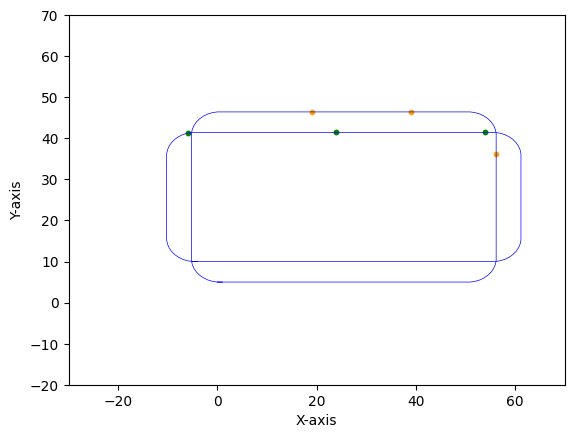

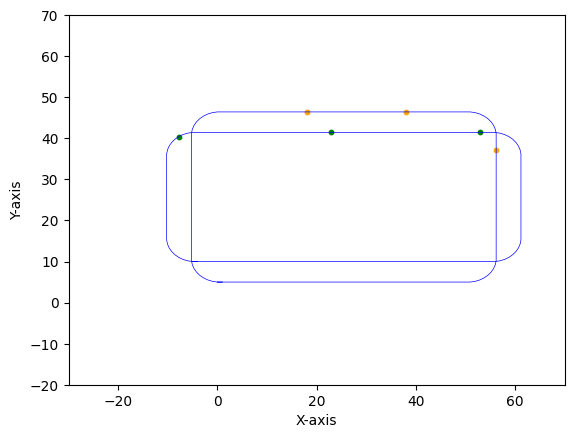

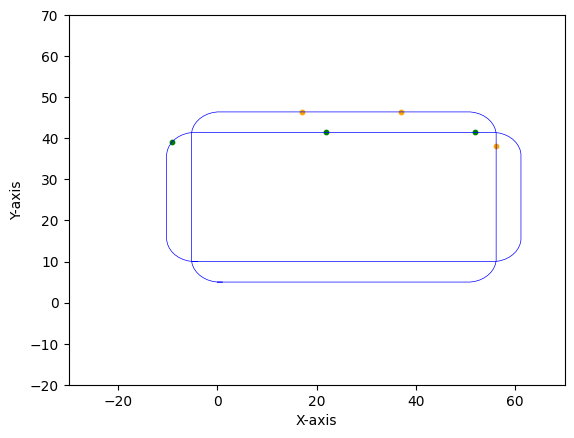

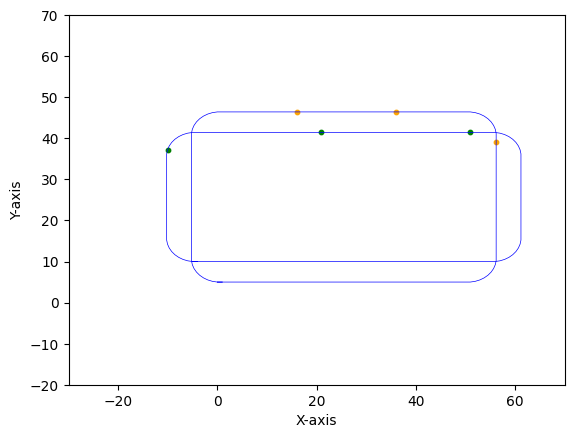

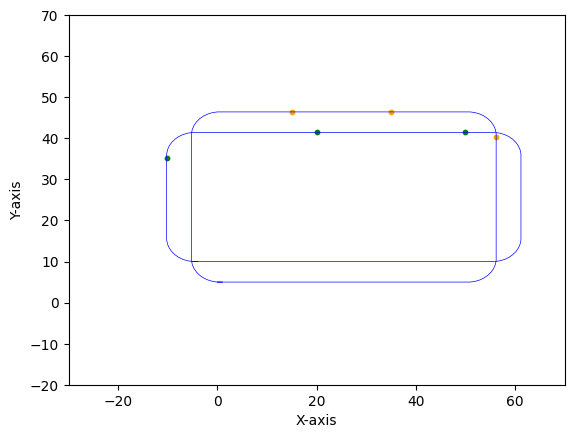

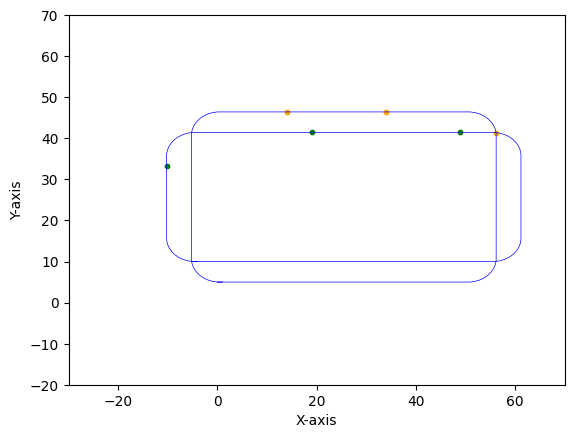

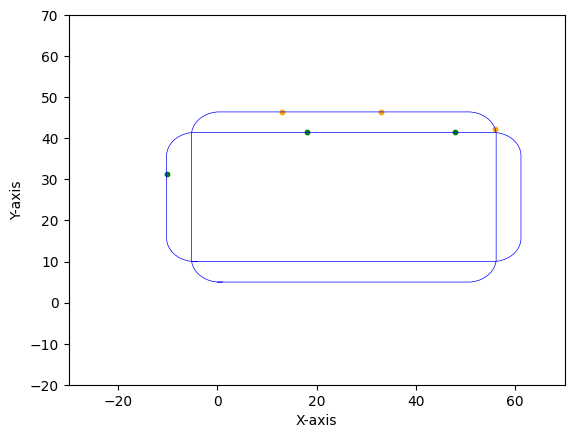

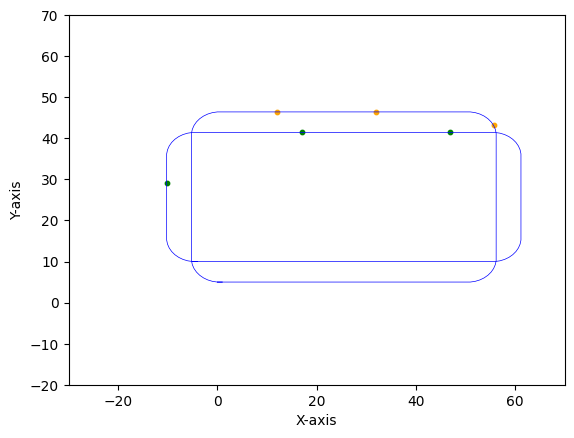

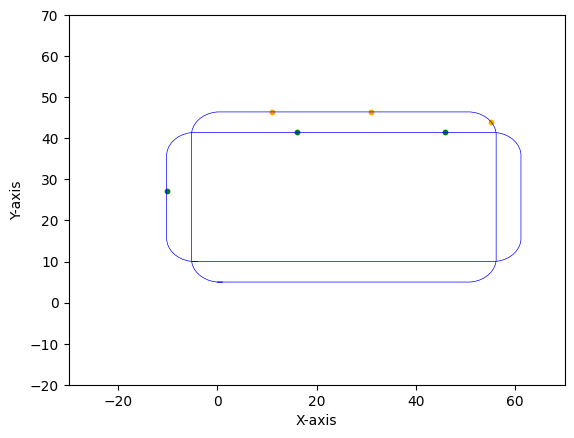

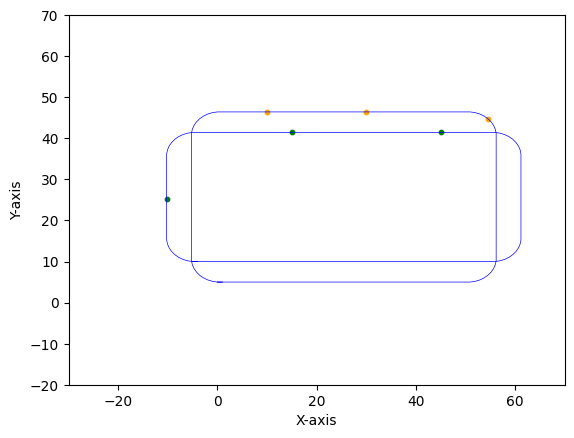

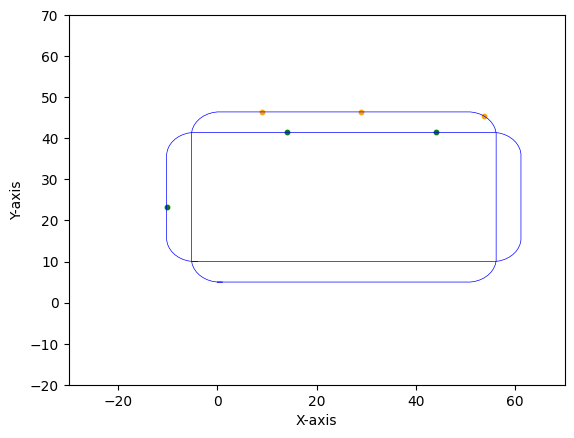

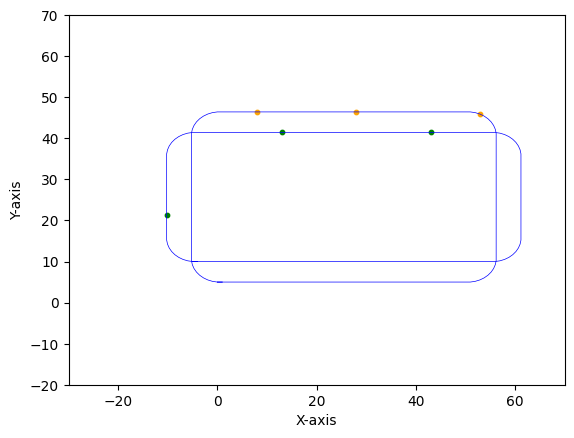

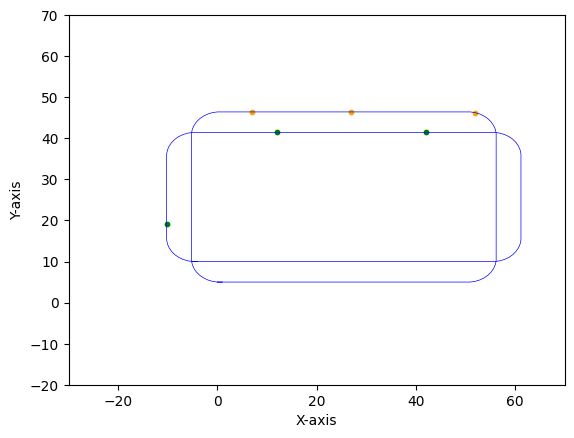

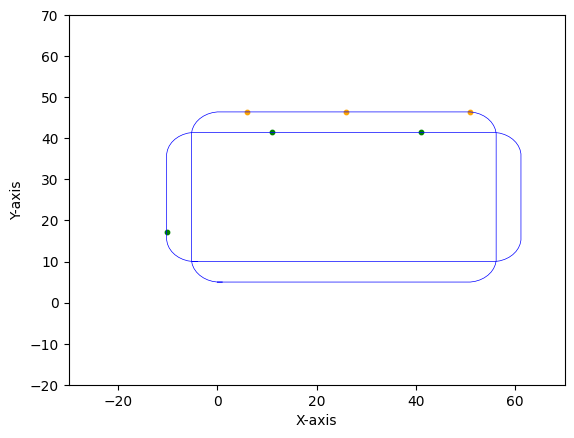

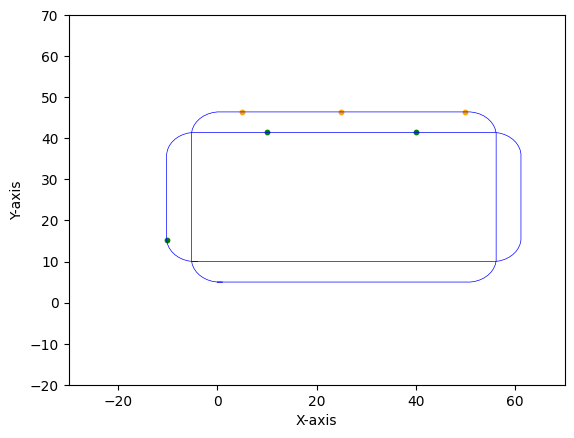

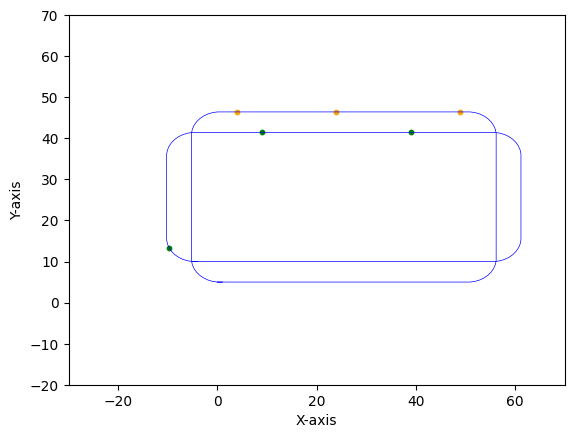

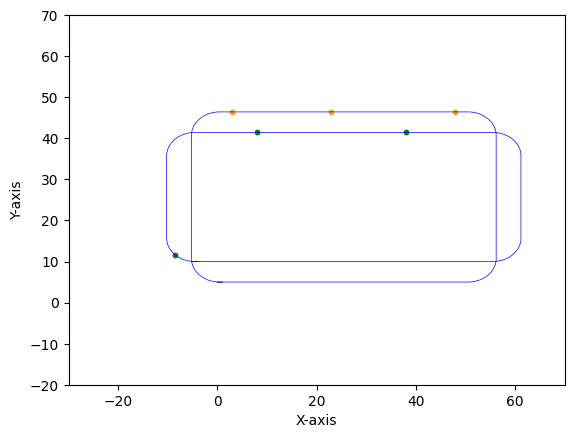

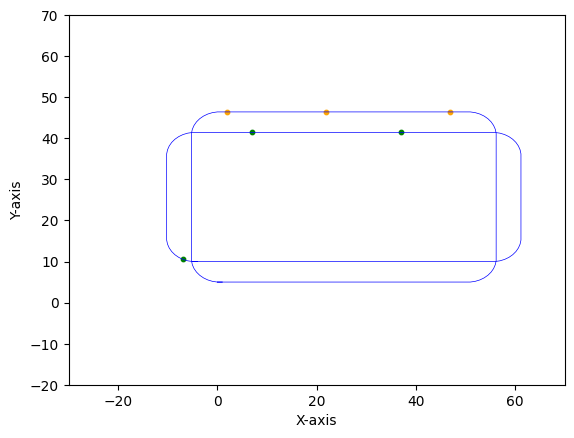

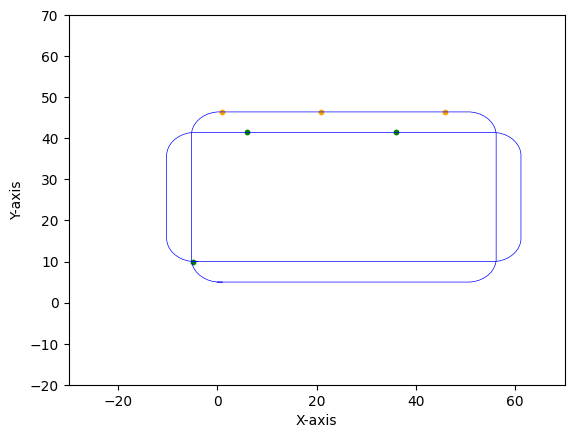

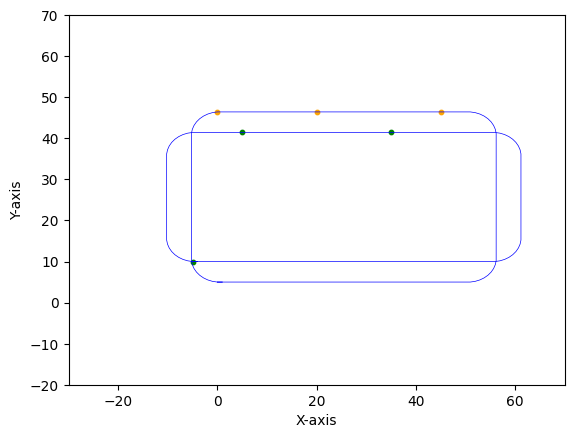

In [25]:
import time

fig, ax = plt.subplots()
ax.set_xlim(-30, 70)
ax.set_ylim(-20, 70)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

angle_count_tuples = [[0, 60], [10, 9], [0, 20], [10, 9], [0, 60], [10, 9], [0, 20], [10, 9]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[-5, 10], [-4, 10]] # start with two entries
point_sequence_one = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_one, ax, line_color='blue')

angle_count_tuples = [[0, 50], [10, 9], [0, 30], [10, 9], [0, 50], [10, 9], [0, 30], [10, 9]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[0, 5], [1, 5]]
point_sequence_two = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_two, ax, line_color='blue')

len_sequence_one = point_sequence_one.shape[0]
len_sequence_two = point_sequence_two.shape[0]

for i in range(0, 100):
    fig, ax = plt.subplots()
    ax.set_xlim(-30, 70)
    ax.set_ylim(-20, 70)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax = draw_lines_based_on_points_on_plot(point_sequence_one, ax, line_color='blue')
    ax = draw_lines_based_on_points_on_plot(point_sequence_two, ax, line_color='blue')
    
    # add points for one image to plot
    points_indices_one = np.mod([2*i, i+20, i+50], len_sequence_one)
    points_indices_two = np.mod([i+5, i+30, i+50], len_sequence_two)
    
    points_one = [point_sequence_one[index] for index in points_indices_one]
    points_two = [point_sequence_two[index] for index in points_indices_two]
    
    ax = draw_points_on_plot(points_one, ax, line_color='green', point_size=10)
    ax = draw_points_on_plot(points_two, ax, line_color='orange', point_size=10)
    
    # plt.show()

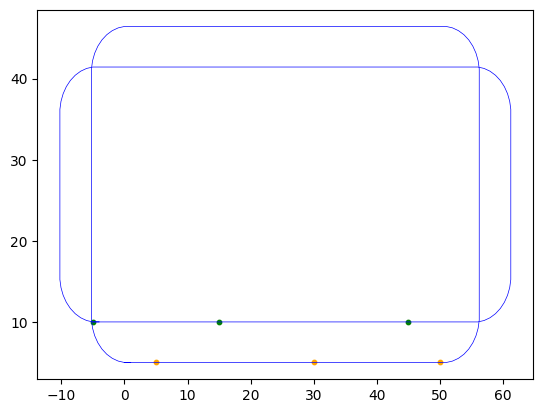

In [32]:
import time

fig, ax = plt.subplots()
ax.set_xlim(-30, 70)
ax.set_ylim(-20, 70)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

angle_count_tuples = [[0, 60], [10, 9], [0, 20], [10, 9], [0, 60], [10, 9], [0, 20], [10, 9]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[-5, 10], [-4, 10]] # start with two entries
point_sequence_one = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_one, ax, line_color='blue')

angle_count_tuples = [[0, 50], [10, 9], [0, 30], [10, 9], [0, 50], [10, 9], [0, 30], [10, 9]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[0, 5], [1, 5]]
point_sequence_two = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_two, ax, line_color='blue')

len_sequence_one = point_sequence_one.shape[0]
len_sequence_two = point_sequence_two.shape[0]

# EXISTING CODE ...

def update(i):
    global ax
    ax.clear()
    
    ax = draw_lines_based_on_points_on_plot(point_sequence_one, ax, line_color='blue')
    ax = draw_lines_based_on_points_on_plot(point_sequence_two, ax, line_color='blue')
    
    points_indices_one = np.mod([2*i, i+20, i+50], len_sequence_one)
    points_indices_two = np.mod([i+5, i+30, i+50], len_sequence_two)
    
    points_one = [point_sequence_one[index] for index in points_indices_one]
    points_two = [point_sequence_two[index] for index in points_indices_two]
    
    ax = draw_points_on_plot(points_one, ax, line_color='green', point_size=10)
    ax = draw_points_on_plot(points_two, ax, line_color='orange', point_size=10)

ani = FuncAnimation(fig, update, frames=range(50), repeat=True)
HTML(ani.to_html5_video())

In [36]:
import time

fig, ax = plt.subplots()
ax.set_xlim(-30, 70)
ax.set_ylim(-20, 70)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

angle_count_tuples = [[0, 60], [10, 9], [0, 20], [10, 9], [0, 60], [10, 9], [0, 20], [10, 9]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[-5, 10], [-4, 10]] # start with two entries
point_sequence_one = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_one, ax, line_color='blue')

angle_count_tuples = [[0, 50], [10, 9], [0, 30], [10, 9], [0, 50], [10, 9], [0, 30], [10, 9]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[0, 5], [1, 5]]
point_sequence_two = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_two, ax, line_color='blue')

scatter_one = ax.scatter([], [], c='green', s=10)
scatter_two = ax.scatter([], [], c='orange', s=10)
time_scale = 5

def update(i):
    global ax, scatter_one, scatter_two, time_scale
    
    points_indices_one = np.mod(time_scale * np.array([2*i, i+20, i+50]), len_sequence_one)
    points_indices_two = np.mod(time_scale * np.array([i+5, i+30, i+50]), len_sequence_two)
    
    points_one = np.array([point_sequence_one[index] for index in points_indices_one])
    points_two = np.array([point_sequence_two[index] for index in points_indices_two])
    
    scatter_one.set_offsets(points_one)
    scatter_two.set_offsets(points_two)
    
    return scatter_one, scatter_two

ani = FuncAnimation(fig, update, frames=range(200), repeat=True, blit=True)
plt.close(fig)
HTML(ani.to_html5_video())

In [37]:
5 * [2, 3, 4, 5]

[2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5]